This is a simple implementation of vanilla autoencoders. Written by Meraj Mammadov (@meraccos)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import random

In [2]:
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        h1 = 100
        h2 = 5     # Latent dimension size
        self.l1 = nn.Linear(28*28, h1)
        self.l2 = nn.Linear(h1, h2)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.l1(x))
        x = F.tanh(self.l2(x))
        return x


class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        h1 = 5
        h2 = 100
        self.l1 = nn.Linear(h1, h2)
        self.l2 = nn.Linear(h2, 28*28)    
        
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.tanh(self.l2(x))
        return x

In [3]:
# load the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
encoder = Encoder()
decoder = Decoder()

optimizer = torch.optim.Adam(list(encoder.parameters())+list(decoder.parameters()))

losses = []

In [5]:
# Train and log the losses
for image, _ in trainloader:
    enc = encoder(image)
    dec = decoder(enc)
    loss = F.mse_loss(image.view(-1, 28*28), dec)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.detach())

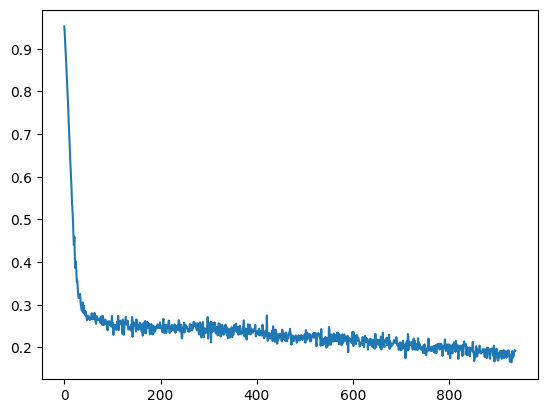

In [6]:
plt.plot(losses)
plt.show()

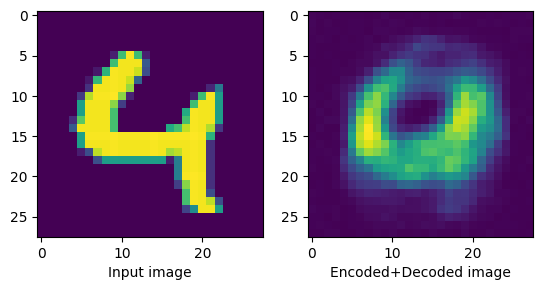

In [11]:
# Test the model by encoding and decoding a training image

n = random.choice(range(image.shape[0]))

plt.subplot(1, 2, 1)
plt.xlabel('Input image')
plt.imshow(image[n].squeeze())

plt.subplot(1, 2, 2)
plt.xlabel('Encoded+Decoded image')
plt.imshow(dec[n].view(28, 28).detach())
plt.show()

What is remarkable about the AEs is how much information about the original image they can squeeze into a very low-dimensional latent vector.
This implementation transforms 28x28 img -> vector of size 5 -> 28x28 img

Now let's try to generate unseen data by adding some noise to the original encoded vector.

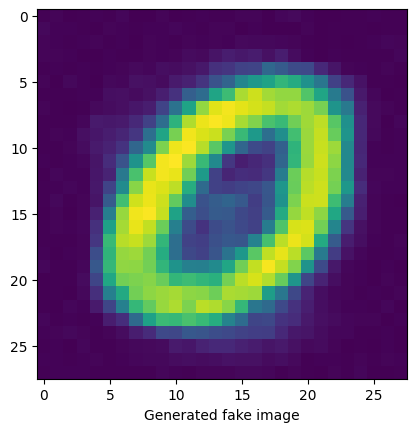

In [8]:
noise = torch.rand((1, enc.shape[1]))
fake_image = decoder(enc[n]+noise).view(28, 28).detach()

plt.imshow(fake_image)
plt.xlabel('Generated fake image')
plt.show()

A peek into the latent space:

In [9]:
enc = encoder(image).detach()
print(enc[6])

tensor([-0.6903,  0.6318, -0.9422, -0.6616, -0.9344])
